In [33]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-12 18:34:43,398: Credentials are already in use. The existing account in the session will be replaced.


In [34]:
# Make our circuit QuantumCircuit(qbit, classical bit)
circuit = QuantumCircuit(2, 2)

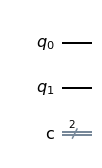

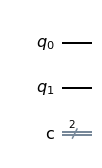

In [35]:
circuit.draw()

In [36]:
circuit.h(0)

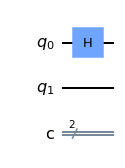

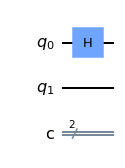

In [37]:
circuit.draw()

In [38]:
# 0 -> control qubit
# 1 -> target qubit
circuit.cx(0,1)
circuit.measure([0,1], [0, 1])

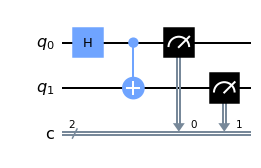

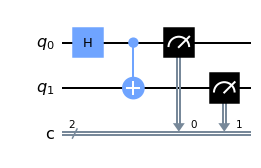

In [39]:
circuit.draw()

In [40]:
simulator = Aer.get_backend("qasm_simulator")

In [41]:
result = execute(circuit, backend=simulator).result()

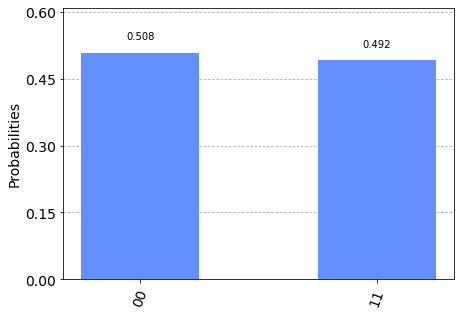

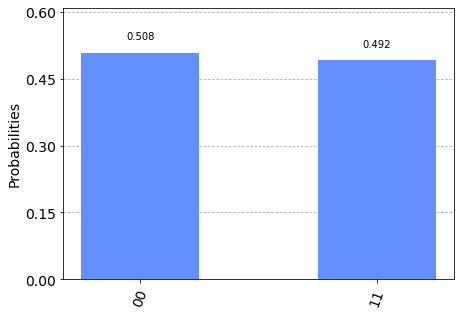

In [42]:
plot_histogram(result.get_counts(circuit))

In [43]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [44]:
provide = IBMQ.get_provider("ibm-q")

In [45]:
for backend in provide.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 1 & simulated qubits
ibmqx2 : 943 & 5 qubits
ibmq_16_melbourne : 44 & 15 qubits
ibmq_armonk : 2 & 1 qubits
ibmq_athens : 18 & 5 qubits
ibmq_santiago : 27 & 5 qubits
ibmq_lima : 36 & 5 qubits
ibmq_belem : 3 & 5 qubits
ibmq_quito : 8 & 5 qubits
simulator_statevector : 1 & simulated qubits
simulator_mps : 1 & simulated qubits
simulator_extended_stabilizer : 1 & simulated qubits
simulator_stabilizer : 1 & simulated qubits
ibmq_manila : 7 & 5 qubits


In [46]:
quantum_computer = provide.get_backend("ibmq_belem")

In [47]:
%qiskit_job_watcher
from qiskit.tools.monitor import job_monitor
job = execute(circuit, backend=quantum_computer)
job_monitor(job)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run


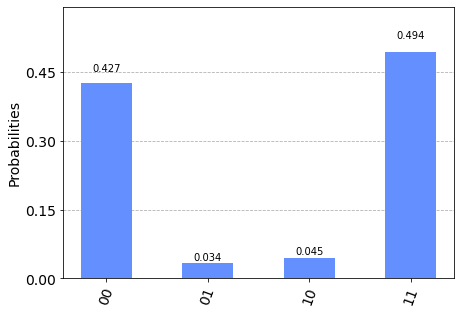

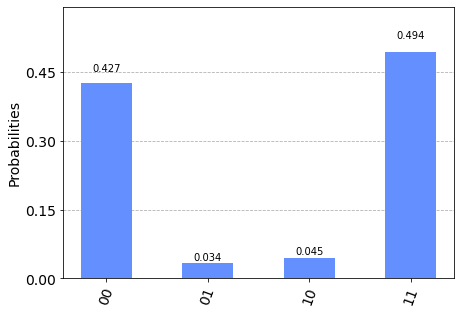

In [48]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [49]:
%qiskit_disable_job_watcher